Regresión Lineal Múltiple

Universidad Nacional Autónoma de México

Facultad de Estudios Superiores Acatlán

Licenciatura en Ciencia de Datos

Rosales Herrera Jonathan Adrian

3-1724328-6

23/08/2023

---

##Objetivo

El objetivo es profundizar en el análisis de regresión al explorar dos enfoques clave: la regresión lineal de mínimos cuadrados ordinarios (OLS) y la regresión lineal polinómica. Su propósito principal compara y contrasta las predicciones obtenidas de estos dos modelos en conjunto. Se busca comprender cómo estas técnicas de modelado y transformación de datos influyen en la capacidad de realizar predicciones precisas y adaptarse a relaciones no lineales en los datos

##Materiales y Métodos


*   Conjunto de datos *50_Startups.csv*
*   Conjunto de datos *Salarios.csv*
*   Herramientas de Programación (Google Colaboratory)


##Resumen
Se llevó a cabo un análisis detallado de técnicas de regresión al explorar dos enfoques esenciales: la regresión lineal de mínimos cuadrados ordinarios (OLS) y la regresión lineal polinómica. Se implementaron y entrenaron estos modelos utilizando diferentes conjuntos de datos. Posteriormente, se compararon las predicciones generadas por ambos modelos, evaluando su rendimiento. A través de esta comparación, se obtuvo una comprensión más profunda de cómo estos dos enfoques de modelado se desempeñan en términos de precisión predictiva.







##Antecedentes Teóricos

La regresión Lineal es un método de aprendizaje supervisado que establece una relación lineal entre una o más variables predictoras y una variable objetivo. Esta ecuación se observa como una recta que se ajusta a la dispersión de los datos minimizando la suma de los cuadrados de las diferencias entre las observaciones reales y las predicciones generadas por el modelo

##Desarrollo

###Regresión Lineal

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [ ]:
df = pd.read_csv('/content/50_Startups.csv')

In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:,4].values

In [ ]:
ls = ColumnTransformer([('State', OneHotEncoder(categories='auto'),[3])], remainder='passthrough')
X = ls.fit_transform(X).astype(float)

In [ ]:
pd.DataFrame(X).head()

,0,1,2,3,4,5
0,0.0,0.0,1.0,165349.20,136897.80,471784.10
1,1.0,0.0,0.0,162597.70,151377.59,443898.53
2,0.0,1.0,0.0,153441.51,101145.55,407934.54
3,0.0,0.0,1.0,144372.41,118671.85,383199.62
4,0.0,1.0,0.0,142107.34,91391.77,366168.42


In [ ]:
X = X[:,1:]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=0)

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = linreg.predict(X_test)

In [ ]:
y_pred, y_test

(array([103015.20159796, 132582.27760816, 132447.73845175,  71976.09851259,
        178537.48221054, 116161.24230163,  67851.69209676,  98791.73374688,
        113969.43533012, 167921.0656955 ]),
 array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
         81229.06,  97483.56, 110352.25, 166187.94]))

###Regresión OLS

In [ ]:
X = np.append(arr = np.ones((50,1)).astype(int), axis=1, values=X)

In [ ]:
SL = 0.05

In [ ]:
X_opt = X[:,[0,1,3,4,5]].tolist()
olsreg = sm.OLS(endog= y, exog= X_opt).fit()
olsreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Mon, 28 Aug 2023   Prob (F-statistic):           8.49e-29
Time:                        17:04:38   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
x1           220.1585   2900.536      0.076      0.940   -5621.821    6062.138
x2             0.8060      0.046     17.606      0.000       0.714       0.898
x3            -0.0270      0.052     -0.523      0.604      -0.131       0.077
x4             0.0270      0.017      1.592      0.118      -0.007       0.061
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X_opt = X[:,[0,3,4,5]].tolist()
olsreg = sm.OLS(endog= y, exog= X_opt).fit()
olsreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 28 Aug 2023   Prob (F-statistic):           4.53e-30
Time:                        17:05:28   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X_opt = X[:,[0,3,5]].tolist()
olsreg = sm.OLS(endog= y, exog= X_opt).fit()
olsreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Mon, 28 Aug 2023   Prob (F-statistic):           2.16e-31
Time:                        17:10:06   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X_opt = X[:,[0,3]].tolist()
olsreg = sm.OLS(endog= y, exog= X_opt).fit()
olsreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Mon, 28 Aug 2023   Prob (F-statistic):           3.50e-32
Time:                        17:12:33   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X_final = pd.DataFrame(X[:,[0,3]])

In [ ]:
X_final.head()

,0,1
0,1.0,165349.20
1,1.0,162597.70
2,1.0,153441.51
3,1.0,144372.41
4,1.0,142107.34


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_final,y,test_size=.2,random_state=0)

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = linreg.predict(X_test)

In [ ]:
y_pred, y_test

(array([104667.27805998, 134150.83410578, 135207.80019517,  72170.54428856,
        179090.58602508, 109824.77386586,  65644.27773757, 100481.43277139,
        111431.75202432, 169438.14843539]),
 array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
         81229.06,  97483.56, 110352.25, 166187.94]))

###Regresion lineal polinómica

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
df = pd.read_csv('/content/Salarios.csv')

In [ ]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [ ]:
X = df.iloc[:,1:-1].values
y = df.iloc[:,2].values

In [ ]:
linreg = LinearRegression()
linreg.fit(X,y)

LinearRegression()

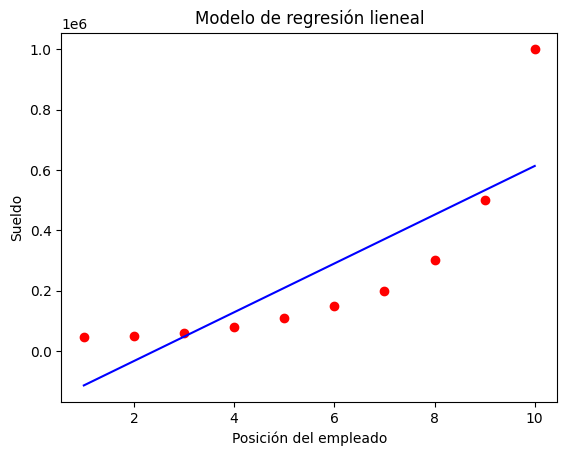

In [ ]:
plt.scatter(X,y,color="red")
plt.plot(X,linreg.predict(X), color="blue")
plt.title("Modelo de regresión lieneal")
plt.xlabel("Posición del empleado")
plt.ylabel("Sueldo")
plt.show()

In [ ]:
polyreg = PolynomialFeatures(degree=2)

In [ ]:
X_poly = polyreg.fit_transform(X)

In [ ]:
linreg2 = LinearRegression()
linreg2.fit(X_poly,y)

LinearRegression()

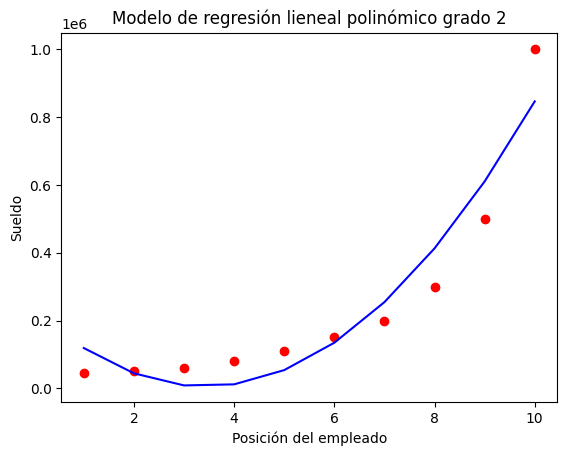

In [ ]:
plt.scatter(X,y,color="red")
plt.plot(X,linreg2.predict(X_poly), color="blue")
plt.title("Modelo de regresión lieneal polinómico grado 2")
plt.xlabel("Posición del empleado")
plt.ylabel("Sueldo")
plt.show()

In [ ]:
polyreg3 = PolynomialFeatures(degree=3)
X_poly3 = polyreg3.fit_transform(X)
linreg3 = LinearRegression()
linreg3.fit(X_poly3,y)

LinearRegression()

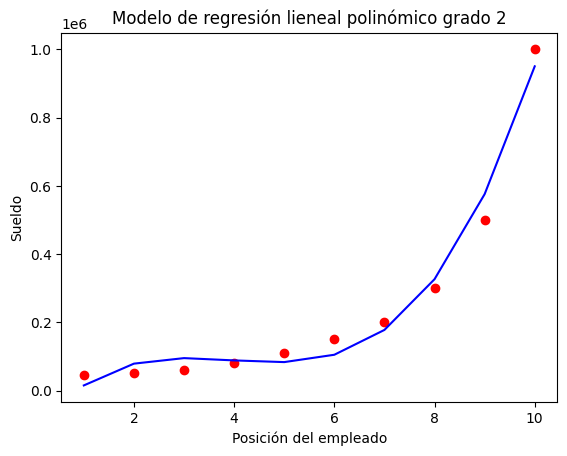

In [ ]:
plt.scatter(X,y,color="red")
plt.plot(X,linreg3.predict(X_poly3), color="blue")
plt.title("Modelo de regresión lieneal polinómico grado 2")
plt.xlabel("Posición del empleado")
plt.ylabel("Sueldo")
plt.show()

In [ ]:
polyreg4 = PolynomialFeatures(degree=4)
X_poly4 = polyreg4.fit_transform(X)
linreg4 = LinearRegression()
linreg4.fit(X_poly4,y)

LinearRegression()

In [ ]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)

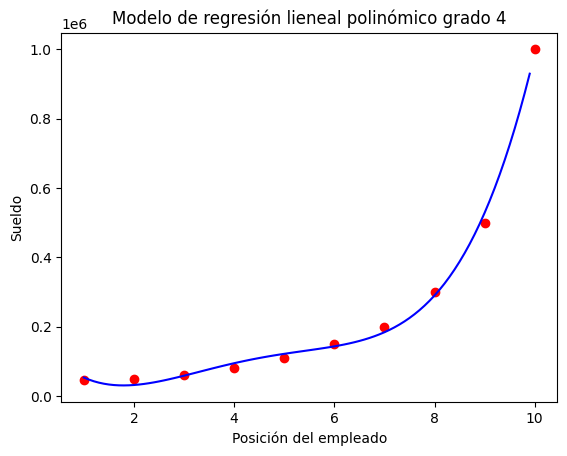

In [ ]:
plt.scatter(X,y,color="red")
plt.plot(X_grid,linreg4.predict(polyreg4.fit_transform(X_grid)), color="blue")
plt.title("Modelo de regresión lieneal polinómico grado 4")
plt.xlabel("Posición del empleado")
plt.ylabel("Sueldo")
plt.show()

###Predicción de los modelos

In [ ]:
linreg.predict([[6.5]])

array([330378.78787879])

In [ ]:
linreg2.predict(polyreg.fit_transform([[6.5]]))

array([189498.10606061])

In [ ]:
linreg3.predict(polyreg3.fit_transform([[6.5]]))

array([133259.46969697])

In [ ]:
linreg4.predict(polyreg4.fit_transform([[6.5]]))

array([158862.45265155])

In [ ]:
print( linreg.predict([[8]]),
linreg2.predict(polyreg.fit_transform([[8]])),
linreg3.predict(polyreg3.fit_transform([[8]])),
linreg4.predict(polyreg4.fit_transform([[8]])))

[451696.96969697] [412833.33333333] [326312.35431236] [289994.17249417]


##Conclusiones

Las conclusiones derivadas de este proyecto son esclarecedoras en cuanto a los enfoques de regresión explorados. En primer lugar, se observa que la regresión lineal de mínimos cuadrados ordinarios (OLS) es una técnica sólida para modelar relaciones lineales entre variables. Su simplicidad y capacidad para identificar relaciones directas son puntos destacables. Por otro lado, la regresión lineal polinómica se presenta como una herramienta valiosa para capturar relaciones no lineales en los datos. La introducción de términos polinómicos permite un mayor ajuste a patrones más complejos. La comparación de predicciones entre ambos modelos resalta que la elección depende de la naturaleza del problema y de la complejidad de los datos. En conjunto, se refuerza la importancia de elegir sabiamente entre enfoques de regresión en función de la estructura y el comportamiento de los datos.




variable en el conjunto de datos.

##Referencias


*   XLSTAT. (2023) Regresión Lineal de los Mínimos Cuadrados(OLS). Lumivero. https://www.xlstat.com/es/soluciones/funciones/regresion-lineal-de-los-minimos-cuadrados-ols
*   Gonzalez, L. (2023). Regresión Polinomial - Teoría. Aprende IA. https://aprendeia.com/algoritmo-regresion-polinomial-machine-learning/

